In [1]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
import json
from io import StringIO

from collections import OrderedDict
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource, gridplot , output_file
from bokeh.models import HoverTool 
from bokeh.io import vform
from bokeh.palettes import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

os.chdir('c://users/grlurton/Google Drive/elections_niger')

## Données carto
with open('data/dept_map.json') as json_data:
    carto_dept = json.load(json_data)
    json_data.close()
    
with open('data/reg_map.json') as json_data:
    carto_reg = json.load(json_data)
    json_data.close()

## Données électeurs
store_electeurs = pd.HDFStore('data/full_data.h5')
data_electeurs = store_electeurs['complete_data']
store_electeurs.close()    
    
## Données résultats premier tour
store_resultats = pd.HDFStore('data/data_resultats.h5')
resultats_regions1 = store_resultats['data_regions']
resultats_departements1 = store_resultats['data_departements']
resultats_communes1 = store_resultats['data_communes']
store_resultats.close()

## Données résultats second tour
store_resultats = pd.HDFStore('data/data_resultats_second_tour.h5')
resultats_regions2 = store_resultats['data_regions']
resultats_departements2 = store_resultats['data_departements']
resultats_communes2 = store_resultats['data_communes']
store_resultats.close()

## Données contextuelles
liste_depts = pd.read_csv('data/Niger_Departements.csv', 
                          encoding = "ISO-8859-1")

In [2]:
candidats1 = ['Laouan Magagi', 'Mahaman Jean Philipe Padonou', 'Abdou Labo', 'Kassoum M. Moctar', 'Adal Rhoubeid', 
             'Mahamane Ousmane', 'Seyni Omar', 'Tahirou Guimba', 'Hama Amadou', 'Ibrahim Yacouba', 'Mahaman Hamissou Maman',
             'Mahamadou Issoufou', 'Dr. Abdoulaye Amadou Traoré', 'Cheffou Amadou','Boubacar Cissé']

candidats2 = ['Hama Amadou', 'Mahamadou Issoufou']


participation = ['Inscrits', 'Inscrits ayant voté', 'Votants sur liste additive', 'Nbre total de votants', 'Bulletins blancs ou nuls',
          'Suffrages exprimés valables']

def get_pourcentage(resultat , candidats) :
    for col in candidats :
        prop_candidat =  'prop_' + col
        prop_expr_candidat = 'prop_expr_' + col
        resultat[prop_candidat] = resultat[col] / resultat['Nbre total de votants']
    return resultat

In [3]:
resultats_departements1 = get_pourcentage(resultats_departements1 , candidats1)
resultats_departements2 = get_pourcentage(resultats_departements2 , candidats2)

In [4]:
splitted = resultats_departements2['Taux de participation'].str.split(' ').str.get(0)

In [5]:
resultats_departements2['particip_float'] = splitted.astype(float) / 100

In [6]:
resultats_departements2['prop_Hama Amadou_r']  = resultats_departements2['particip_float'] * resultats_departements2['prop_Hama Amadou'] 

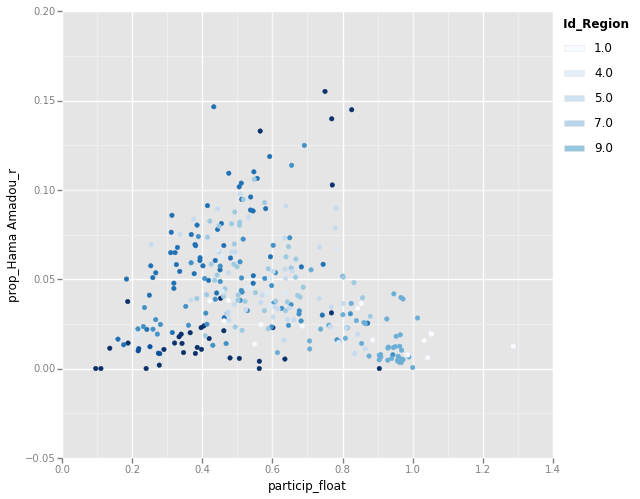

<ggplot: (-9223372032958278631)>

In [7]:
liste_depts.ID_DEPART = liste_depts.ID_DEPART.astype(str) 
dat = pd.merge(liste_depts , resultats_departements2 , left_on = 'ID_DEPART' , right_on = 'zone_id' )

ggplot(aes(x='particip_float', y='prop_Hama Amadou_r' , colour = 'ID_REGION' ), data=dat ) +  \
geom_point()

In [2]:
resultats_regions2.head()

,ID,Département,Inscrits,Inscrits ayant voté,Votants sur liste additive,Nbre total de votants,Bulletins blancs ou nuls,Suffrages exprimés valables,Taux de participation,Hama Amadou,Mahamadou Issoufou,time,zone_id
0,Region de :AGADEZ,ADERBISSINAT,20606,18183,2350,20533,219,20314,98.58 %,158,20156,2016-07-07 14:42:43.044756,1
1,Region de :AGADEZ,ARLIT,46115,29486,3974,33460,955,32505,70.49 %,1067,31438,2016-07-07 14:42:43.044756,1
2,Region de :AGADEZ,BILMA,7795,3792,167,3959,98,3861,49.53 %,238,3623,2016-07-07 14:42:43.044756,1
3,Region de :AGADEZ,IFEROUANE,19521,17704,2857,20561,123,20438,104.7 %,236,20202,2016-07-07 14:42:43.044756,1
4,Region de :AGADEZ,INGALL,26647,24813,3561,28374,304,28070,105.34 %,518,27552,2016-07-07 14:42:43.044756,1


In [6]:
20314/20606

0.9858293700863826

In [7]:
19512+2857

22369